In [19]:
import os
import pymaid
import logging
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
from itertools import chain, combinations
from upsetplot import plot
from matplotlib import pyplot as plt
from networkx import from_numpy_array, from_pandas_adjacency, number_of_nodes, number_of_edges, density
from graspologic.embed import AdjacencySpectralEmbed
from graspologic.layouts import layout_tsne, layout_umap
from graspologic.plot.plot import networkplot
from graspologic.utils import is_fully_connected, largest_connected_component, is_symmetric, symmetrize

In [3]:
rm = pymaid.CatmaidInstance(
    server="https://catmaid.jekelylab.ex.ac.uk/#",
    project_id=11,
    api_token=None,
    http_user=None,
    http_password=None,
)
logging.getLogger("pymaid").setLevel(logging.WARNING)
pymaid.clear_cache()

path = "/Users/kareefullah/Desktop/neurodata/neurodata/platy-data/docs/outputs"

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [8]:
skids_left = pymaid.get_skids_by_annotation("left")
skids_right = pymaid.get_skids_by_annotation("right")
skids_head = pymaid.get_skids_by_annotation("head")
skids_pygidium = pymaid.get_skids_by_annotation("pygidium")
skids_0 = pymaid.get_skids_by_annotation("segment_0")
skids_1 = pymaid.get_skids_by_annotation("segment_1")
skids_2 = pymaid.get_skids_by_annotation("segment_2")
skids_3 = pymaid.get_skids_by_annotation("segment_3")

In [12]:
df_left = pymaid.adjacency_matrix(skids_left)
df_right = pymaid.adjacency_matrix(skids_right)
df_head = pymaid.adjacency_matrix(skids_head)
df_pygidium = pymaid.adjacency_matrix(skids_pygidium)
df_0 = pymaid.adjacency_matrix(skids_0)
df_1 = pymaid.adjacency_matrix(skids_1)
df_2 = pymaid.adjacency_matrix(skids_2)
df_3 = pymaid.adjacency_matrix(skids_3)

In [13]:
nx_left = from_pandas_adjacency(df_left, create_using=nx.DiGraph)
nx_right = from_pandas_adjacency(df_right, create_using=nx.DiGraph)
nx_head = from_pandas_adjacency(df_head, create_using=nx.DiGraph)
nx_pygidium = from_pandas_adjacency(df_pygidium, create_using=nx.DiGraph)
nx_0 = from_pandas_adjacency(df_0, create_using=nx.DiGraph)
nx_1 = from_pandas_adjacency(df_1, create_using=nx.DiGraph)
nx_2 = from_pandas_adjacency(df_2, create_using=nx.DiGraph)
nx_3 = from_pandas_adjacency(df_3, create_using=nx.DiGraph)

In [17]:
dens_left = density(nx_left)
dens_right = density(nx_right)
dens_head = density(nx_head)
dens_pygidium = density(nx_pygidium)
dens_0 = density(nx_0)
dens_1 = density(nx_1)
dens_2 = density(nx_2)
dens_3 = density(nx_3)

In [21]:
labels = ["left", "right", "head", "pygidium", "0", "1", "2", "3"]
densities = [dens_left, dens_right, dens_head, dens_pygidium, dens_0, dens_1, dens_2, dens_3]


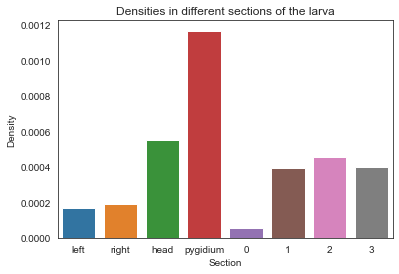

In [30]:
sns.set_style("white")
sns.barplot(x=labels, y=densities) 

plt.title("Densities in different sections of the larva")
plt.xlabel("Section")
plt.ylabel("Density")
plt.savefig(path + "/densities_sections")